In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Summary statistics of the dataset
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


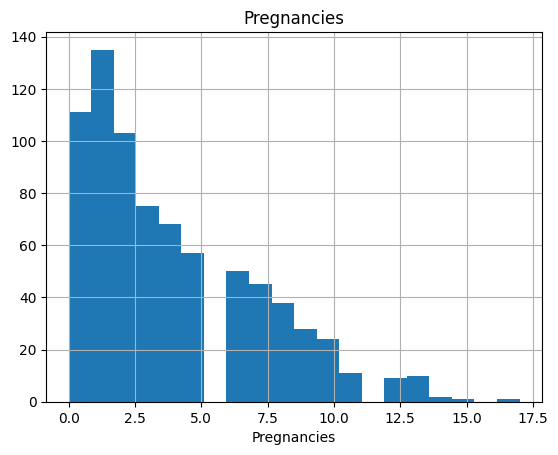

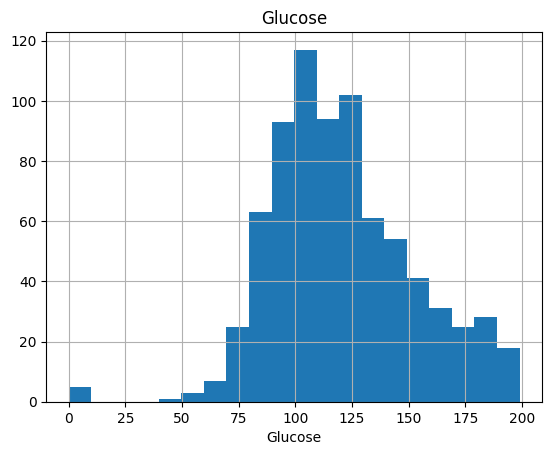

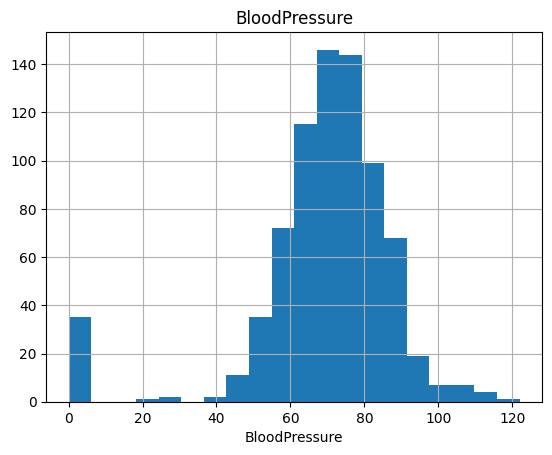

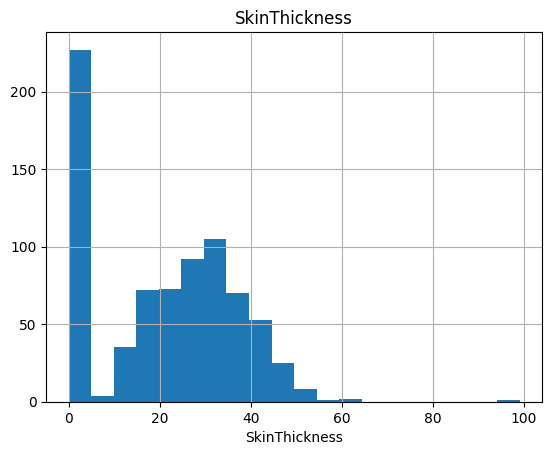

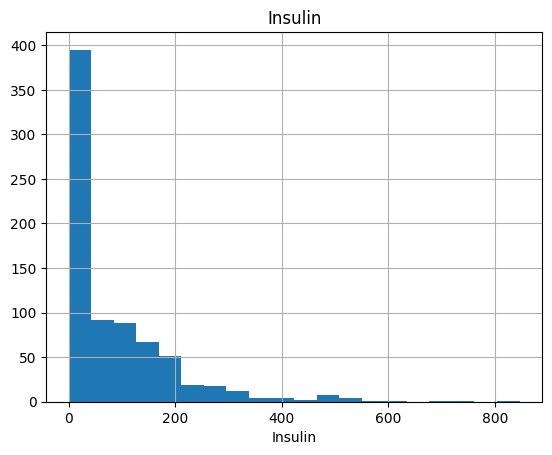

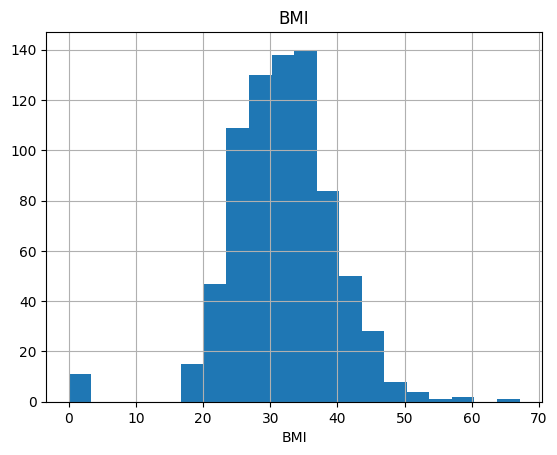

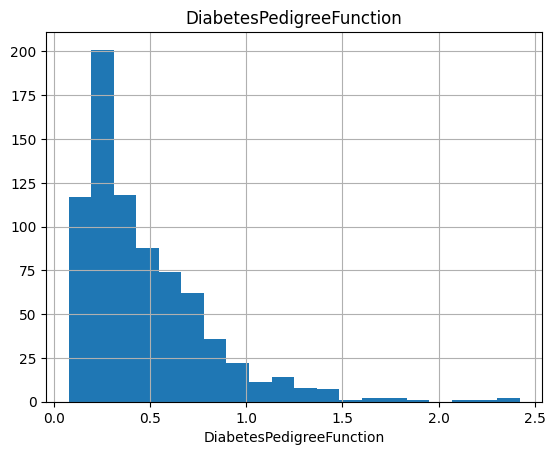

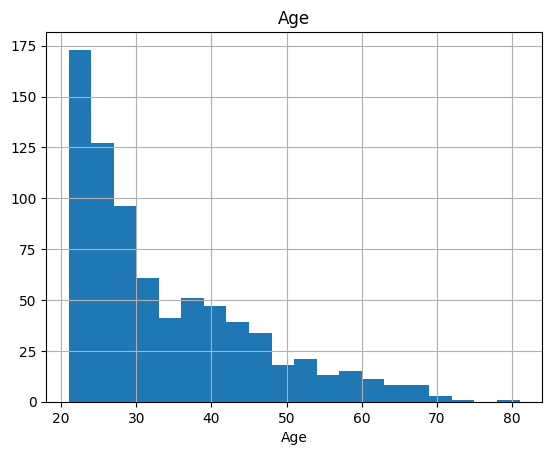

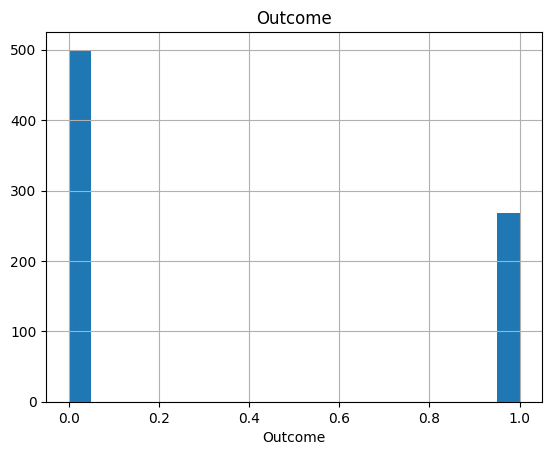

In [14]:
# Visualize with histograms
for col in df.keys(): 
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show(block=True)

In [22]:
# BASE MODEL (no feature engineering)

# Dependent var
y = df["Outcome"]

# Independent vars
X = df.drop("Outcome", axis=1)

# Split into test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [23]:
def print_classifier_performance(name, y_pred, y_test):
    print(name)
    print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
    print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
    print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
    print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
    print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

In [27]:
# Random forest

# Train

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Predict

y_pred = rf_model.predict(X_test)

print_classifier_performance("RandomForestClassifier", y_pred, y_test)

RandomForestClassifier
Accuracy: 0.7706
Recall: 0.7059
Precision: 0.5926
F1: 0.6443
Auc: 0.7517


In [26]:
# Linear regression

lr_model = LogisticRegression(random_state=46).fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print_classifier_performance("LogisticRegression", y_pred, y_test)

LogisticRegression
Accuracy: 0.7706
Recall: 0.7059
Precision: 0.5926
F1: 0.6443
Auc: 0.7517


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# XG boost

xgb_model = XGBClassifier(random_state=46).fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print_classifier_performance("